# EDA for the second challenge 

In [55]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import requests

df = pd.read_csv('BusRoutes.txt', sep='|')
print("Number of Routes >> " + str(df.shape[0]))

Number of Routes >> 48312


# Bus routes

In [56]:
df.columns

Index(['IDRoute', 'linkid'], dtype='object')

In [57]:
df.head(10)

,IDRoute,linkid
0,1,537277300
1,1,537277673
2,1,537277754
3,1,537277777
4,1,537277795
5,1,537277954
6,1,537277980
7,1,537278408
8,1,537278623
9,1,537278860


## Unique Routes and Links

In [58]:
df.nunique(axis=0)

IDRoute      166
linkid     19277
dtype: int64

## Links per Bus Route (e.g, road)

In [59]:
df.groupby('IDRoute', as_index=False)['linkid'].count() \
                                               .rename(columns={'linkid':'Number of Links'}) \
                                               .sort_values("Number of Links", ascending=False) 

,IDRoute,Number of Links
52,53,613
7,8,608
135,136,585
127,128,572
62,63,565
...,...,...
96,97,41
22,23,6
20,21,5
21,22,2


## Bus Routes per Link  

In [60]:
dfLinkRoutesCount = df.groupby('linkid', as_index=False)['IDRoute'].count() \
                                               .rename(columns={'IDRoute':'RoutesNumber'}) \
                                               .sort_values("RoutesNumber", ascending=False) 


dfLinkRoutesCount

,linkid,RoutesNumber
6679,724627591,20
15464,1172432839,20
6678,724627590,20
9401,836110932,20
6676,724627588,20
...,...,...
8991,812148656,1
8993,812148837,1
8995,812149330,1
9000,812234969,1


## Most links are used by few routes 

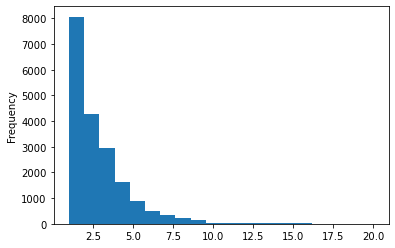

In [61]:
dfLinkRoutesCount.RoutesNumber.plot.hist(bins=20);

## Possible "stroke" points (Links with too many routes going through them)

In [62]:
dfSenior = pd.read_csv('Senior_TIM_v1.txt', sep='|', encoding= 'unicode_escape')
print("Number of Routes >> " + str(dfSenior.shape[0]))

Number of Routes >> 121053


In [63]:
dfSenior.columns


Index(['linkid', 'Region_of_Origin', 'District_of_Origin', 'County_of_Origin',
       'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

In [64]:
dfSenior.head()

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187
1,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396
2,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248
3,80216810,R1 - AM Lisboa,Lisboa,Vila Franca de Xira,233.203075
4,80216812,R1 - AM Lisboa,Lisboa,Lisboa,261.606014


In [65]:
joinedDf=dfSenior.merge(df)
joinedDf.head()

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling,IDRoute
0,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,8
1,80216810,R1 - AM Lisboa,Lisboa,Lisboa,2013.681187,85
2,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396,8
3,80216810,R1 - AM Lisboa,Setúbal,Palmela,7688.296396,85
4,80216810,R1 - AM Lisboa,Lisboa,Oeiras,220.647248,8


# Links/Routes per Region, District and County

In [66]:
joinedDf.groupby("Region_of_Origin").agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values("NumberOfLinks", ascending=False) 

,NumberOfLinks,NumberOfRoutes,AvgDailyPopulation
Region_of_Origin,,,
R1 - AM Lisboa,6184,160,576.977871
R2 - AM Porto,3803,133,2435.724436


In [67]:
joinedDf.groupby("District_of_Origin").agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values("NumberOfLinks", ascending=False) 

,NumberOfLinks,NumberOfRoutes,AvgDailyPopulation
District_of_Origin,,,
Lisboa,5916,158,628.158972
Porto,3777,133,2451.672828
Setúbal,2368,141,365.034285
Aveiro,32,16,272.407024


In [128]:
linksRoutesPerOrigin=joinedDf.groupby(["District_of_Origin", "County_of_Origin"]).agg({'linkid': 'nunique', 'IDRoute': 'nunique', 'Average_Daily_SeniorPopulation_Travelling': 'mean'}) \
                                   .rename(columns={'linkid':'NumberOfLinks', 'IDRoute':'NumberOfRoutes', 'Average_Daily_SeniorPopulation_Travelling': 'AvgDailyPopulation'}) \
                                   .sort_values(["District_of_Origin", "AvgDailyPopulation"], ascending=[True,  False]) 

linksRoutesPerOrigin

NumberOfLinks  NumberOfRoutes  \
District_of_Origin County_of_Origin                                      
Aveiro             Santa Maria da Feira             32              16   
Lisboa             Lisboa                         3832             132   
                   Odivelas                       1255             120   
                   Oeiras                         2824             152   
                   Vila Franca de Xira            1929             100   
                   Sintra                         1226             107   
                   Cascais                         472              98   
                   Amadora                         613              92   
                   Mafra                           283              81   
                   Loures                          141              51   
Porto              Maia                           2670              99   
                   Porto                          1478             110   
                   Gondomar                       1076              95   
                   Matosinhos                      195              33   
Setúbal            Palmela                         240              68   
                   Alcochete                         6               8   
                   Montijo                          55              15   
                   Barreiro                       1285             119   
                   Seixal                          942             110   
                   Setúbal                         113              29   
                   Sesimbra                         49              24   
                   Almada                          131              44   

                                         AvgDailyPopulation  
District_of_Origin County_of_Origin                          
Aveiro             Santa Maria da Feira          272.407024  
Lisboa             Lisboa                       1176.641628  
                   Odivelas                      715.200512  
                   Oeiras                        394.144009  
                   Vila Franca de Xira           364.993711  
                   Sintra                        351.236967  
                   Cascais                       285.334270  
                   Amadora                       155.706508  
                   Mafra                         144.367737  
                   Loures                        141.271239  
Porto              Maia                         3400.213919  
                   Porto                        2213.490123  
                   Gondomar                     1084.179459  
                   Matosinhos                    823.843490  
Setúbal            Palmela                       889.849297  
                   Alcochete                     544.140508  
                   Montijo                       441.206994  
                   Barreiro                      346.062201  
                   Seixal                        329.882526  
                   Setúbal                       138.546544  
                   Sesimbra                      116.808277  
                   Almada                         40.539317

## Open Weather Analysis

In [129]:
conversion_dic= {
    "Porto": "Porto",
    "Aveiro": "Aveiro",
    "Lisboa": "Lisbon",
    "Setúbal": "Setubal"
}
    
def get_history(district_name, city_name):
    print("Retrieving {0} ({1}) history...".format(city_name, district_name))

    # If no city name is available then use district instead
    if city_name in conversion_dic:
        city_name=conversion_dic[city_name]
    
    url = "http://history.openweathermap.org/data/2.5/aggregated/year?q=" + city_name + ",PT&appid=" + "155b4d6acbf49ae8044c54f654953578" \
                + "&start=2019-04-01" \
                + "&end=2020-03-31" \

    request_json=requests.get(url).json()
    if "result" not in request_json:
        return get_history(district_name, district_name)
        
    return pd.json_normalize(request_json["result"])

def get_agg_metric(district, city, col, agg_metric):
    df=get_history(district, city)
    return df.agg({col: agg_metric})[0] 

In [130]:
aveiro_weather=get_history("Aveiro", "Aveiro")
print(aveiro_weather.columns)
aveiro_weather.head()

Retrieving Aveiro (Aveiro) history...
Index(['month', 'day', 'temp.record_min', 'temp.record_max',
       'temp.average_min', 'temp.average_max', 'temp.median', 'temp.mean',
       'temp.p25', 'temp.p75', 'temp.st_dev', 'temp.num', 'pressure.min',
       'pressure.max', 'pressure.median', 'pressure.mean', 'pressure.p25',
       'pressure.p75', 'pressure.st_dev', 'pressure.num', 'humidity.min',
       'humidity.max', 'humidity.median', 'humidity.mean', 'humidity.p25',
       'humidity.p75', 'humidity.st_dev', 'humidity.num', 'wind.min',
       'wind.max', 'wind.median', 'wind.mean', 'wind.p25', 'wind.p75',
       'wind.st_dev', 'wind.num', 'precipitation.min', 'precipitation.max',
       'precipitation.median', 'precipitation.mean', 'precipitation.p25',
       'precipitation.p75', 'precipitation.st_dev', 'precipitation.num',
       'clouds.min', 'clouds.max', 'clouds.median', 'clouds.mean',
       'clouds.p25', 'clouds.p75', 'clouds.st_dev', 'clouds.num'],
      dtype='object')


,month,day,temp.record_min,temp.record_max,temp.average_min,temp.average_max,temp.median,temp.mean,temp.p25,temp.p75,...,precipitation.st_dev,precipitation.num,clouds.min,clouds.max,clouds.median,clouds.mean,clouds.p25,clouds.p75,clouds.st_dev,clouds.num
0,1,1,271.36,291.04,278.82,286.79,282.10,282.38,278.64,285.19,...,0.24,216,0,100,40.0,46.73,0.0,88.0,37.92,216
1,1,2,272.32,291.04,279.75,286.46,283.09,282.77,278.95,286.15,...,0.21,216,0,100,75.0,51.17,11.0,88.0,37.36,216
2,1,3,272.59,291.04,280.87,287.68,285.15,283.64,279.89,287.72,...,1.01,216,0,100,75.0,56.78,0.0,89.0,37.99,216
3,1,4,271.37,291.04,280.78,287.74,285.05,283.69,280.27,287.15,...,0.92,216,0,100,75.0,49.32,0.0,88.0,38.64,216
4,1,5,272.59,291.15,278.30,286.84,281.01,281.97,278.58,285.94,...,0.26,216,0,92,14.0,32.30,0.0,75.0,38.52,216


## Weather City Averages

## Aveiro

In [131]:
print("Temp Year Mean >> " + str(get_agg_metric("Aveiro", "Aveiro", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Aveiro", "Aveiro", "precipitation.mean", "mean")))

Retrieving Aveiro (Aveiro) history...
Temp Year Mean >> 287.9760655737705
Retrieving Aveiro (Aveiro) history...
Precipitation Year Mean >> 0.14245901639344263


## Porto

In [132]:
print("Temp Year Mean >> " + str(get_agg_metric("Porto", "Porto", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Porto", "Porto", "precipitation.mean", "mean")))

Retrieving Porto (Porto) history...
Temp Year Mean >> 288.39592896174867
Retrieving Porto (Porto) history...
Precipitation Year Mean >> 0.12601092896174865


## Lisbon

In [133]:
print("Temp Year Mean >> " + str(get_agg_metric("Lisboa", "Lisboa", "temp.mean", "mean")))
print("Precipitation Year Mean >> " + str(get_agg_metric("Lisboa", "Lisboa", "precipitation.mean", "mean")))

Retrieving Lisboa (Lisboa) history...
Temp Year Mean >> 289.20767759562847
Retrieving Lisboa (Lisboa) history...
Precipitation Year Mean >> 0.10491803278688525


## Join Weather Cols

In [134]:
linksRoutesPerOrigin['AvgYearTemp'] = linksRoutesPerOrigin.apply(lambda row: get_agg_metric(row.name[0], row.name[1], "temp.mean", "mean"), axis=1)
linksRoutesPerOrigin['AvgYearPrecipitation'] = linksRoutesPerOrigin.apply(lambda row: get_agg_metric(row.name[0], row.name[1], "precipitation.mean", "mean"), axis=1)

linksRoutesPerOrigin

Retrieving Santa Maria da Feira (Aveiro) history...
Retrieving Aveiro (Aveiro) history...
Retrieving Lisboa (Lisboa) history...
Retrieving Odivelas (Lisboa) history...
Retrieving Oeiras (Lisboa) history...
Retrieving Lisboa (Lisboa) history...
Retrieving Vila Franca de Xira (Lisboa) history...
Retrieving Sintra (Lisboa) history...
Retrieving Cascais (Lisboa) history...
Retrieving Amadora (Lisboa) history...
Retrieving Mafra (Lisboa) history...
Retrieving Loures (Lisboa) history...
Retrieving Maia (Porto) history...
Retrieving Porto (Porto) history...
Retrieving Gondomar (Porto) history...
Retrieving Matosinhos (Porto) history...
Retrieving Palmela (Setúbal) history...
Retrieving Alcochete (Setúbal) history...
Retrieving Montijo (Setúbal) history...
Retrieving Barreiro (Setúbal) history...
Retrieving Seixal (Setúbal) history...
Retrieving Setúbal (Setúbal) history...
Retrieving Setúbal (Setúbal) history...
Retrieving Sesimbra (Setúbal) history...
Retrieving Almada (Setúbal) history...
R

NumberOfLinks  NumberOfRoutes  \
District_of_Origin County_of_Origin                                      
Aveiro             Santa Maria da Feira             32              16   
Lisboa             Lisboa                         3832             132   
                   Odivelas                       1255             120   
                   Oeiras                         2824             152   
                   Vila Franca de Xira            1929             100   
                   Sintra                         1226             107   
                   Cascais                         472              98   
                   Amadora                         613              92   
                   Mafra                           283              81   
                   Loures                          141              51   
Porto              Maia                           2670              99   
                   Porto                          1478             110   
                   Gondomar                       1076              95   
                   Matosinhos                      195              33   
Setúbal            Palmela                         240              68   
                   Alcochete                         6               8   
                   Montijo                          55              15   
                   Barreiro                       1285             119   
                   Seixal                          942             110   
                   Setúbal                         113              29   
                   Sesimbra                         49              24   
                   Almada                          131              44   

                                         AvgDailyPopulation  AvgYearTemp  \
District_of_Origin County_of_Origin                                        
Aveiro             Santa Maria da Feira          272.407024   287.976066   
Lisboa             Lisboa                       1176.641628   289.207678   
                   Odivelas                      715.200512   289.080137   
                   Oeiras                        394.144009   289.207678   
                   Vila Franca de Xira           364.993711   289.160929   
                   Sintra                        351.236967   289.181366   
                   Cascais                       285.334270   289.449617   
                   Amadora                       155.706508   289.140355   
                   Mafra                         144.367737   289.375546   
                   Loures                        141.271239   289.097404   
Porto              Maia                         3400.213919   288.905246   
                   Porto                        2213.490123   288.395929   
                   Gondomar                     1084.179459   288.931339   
                   Matosinhos                    823.843490   288.423197   
Setúbal            Palmela                       889.849297   289.347240   
                   Alcochete                     544.140508   289.324891   
                   Montijo                       441.206994   289.161311   
                   Barreiro                      346.062201   289.211612   
                   Seixal                        329.882526   289.313279   
                   Setúbal                       138.546544   289.313279   
                   Sesimbra                      116.808277   289.426612   
                   Almada                         40.539317   289.329481   

                                         AvgYearPrecipitation  
District_of_Origin County_of_Origin                            
Aveiro             Santa Maria da Feira              0.142459  
Lisboa             Lisboa                            0.104918  
                   Odivelas                          0.080273  
                   Oeiras                            0.104918  
                   Vila Franca de Xira               0.

## Distribution of links

<AxesSubplot:>

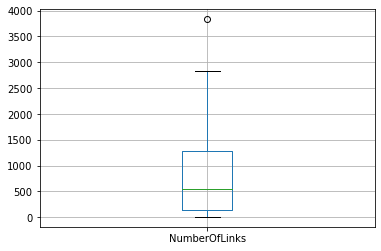

In [92]:
linksRoutesPerOrigin.boxplot('NumberOfLinks')

<AxesSubplot:ylabel='Frequency'>

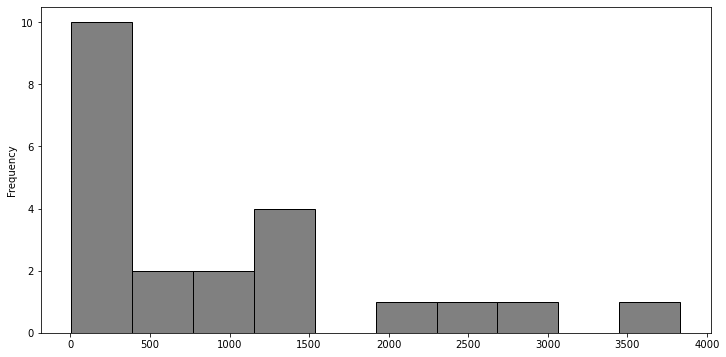

In [99]:
linksRoutesPerOrigin['NumberOfLinks'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of routes

<AxesSubplot:>

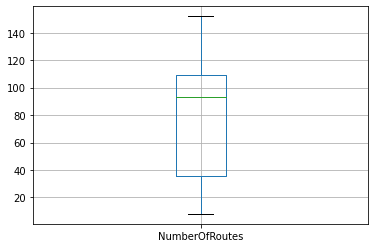

In [94]:
linksRoutesPerOrigin.boxplot('NumberOfRoutes')

<AxesSubplot:ylabel='Frequency'>

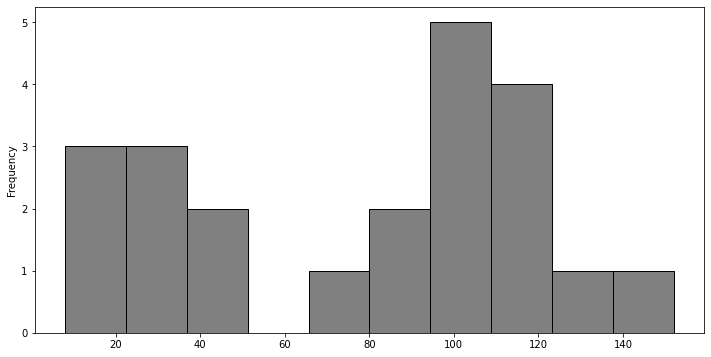

In [100]:
linksRoutesPerOrigin['NumberOfRoutes'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of Average Daily Senior Population

<AxesSubplot:>

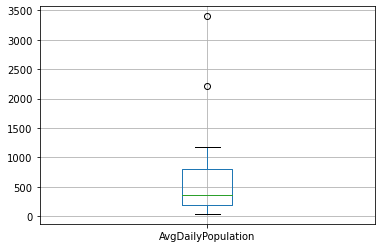

In [95]:
linksRoutesPerOrigin.boxplot('AvgDailyPopulation')

<AxesSubplot:ylabel='Frequency'>

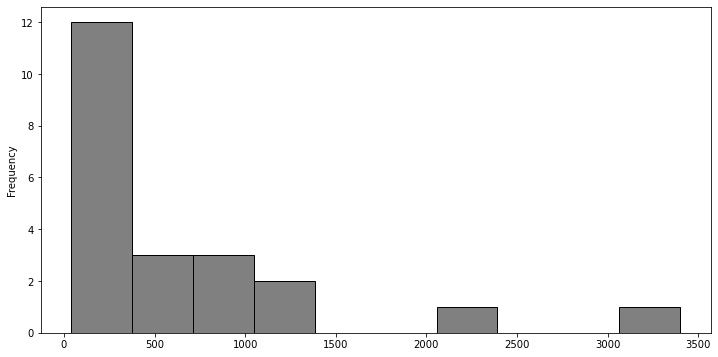

In [101]:
linksRoutesPerOrigin['AvgDailyPopulation'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of Yearly Temperatures

<AxesSubplot:>

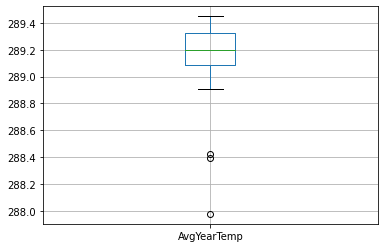

In [144]:
linksRoutesPerOrigin.boxplot('AvgYearTemp')

<AxesSubplot:ylabel='Frequency'>

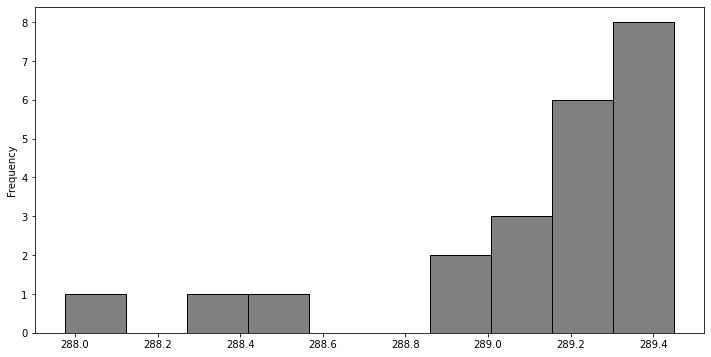

In [145]:
linksRoutesPerOrigin['AvgYearTemp'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Distribution of Yearly Precipitation

<AxesSubplot:>

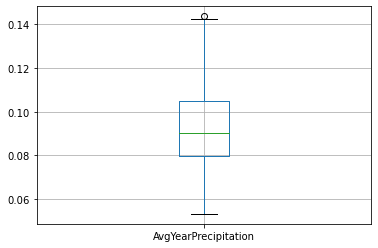

In [146]:
linksRoutesPerOrigin.boxplot('AvgYearPrecipitation')

<AxesSubplot:ylabel='Frequency'>

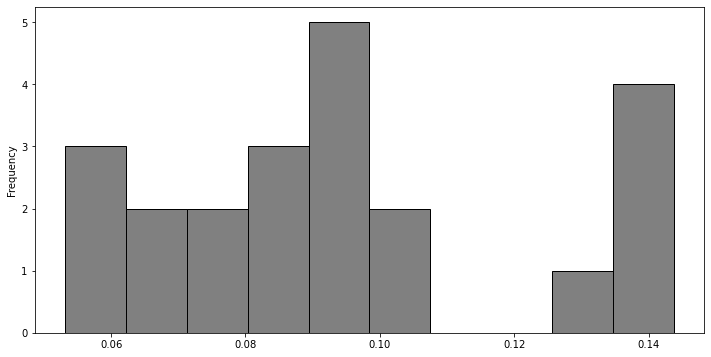

In [147]:
linksRoutesPerOrigin['AvgYearPrecipitation'].plot(kind='hist', bins=10, figsize=(12,6), facecolor='grey',edgecolor='black')

## Correlation Matrix (Globally)

<AxesSubplot:>

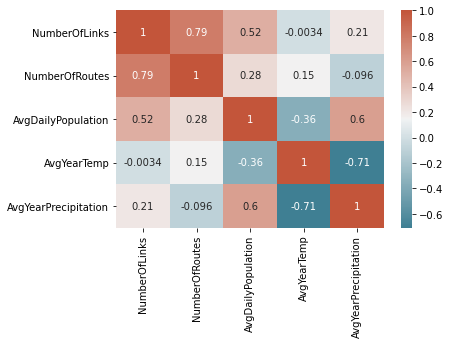

In [135]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

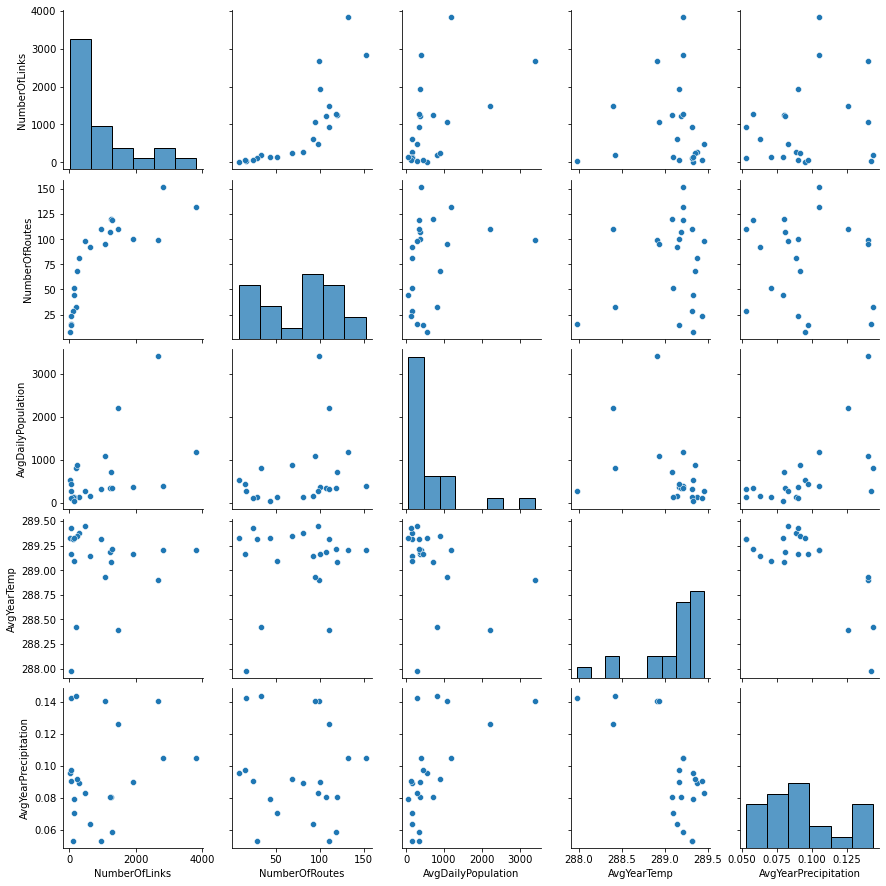

In [136]:
sns.pairplot(linksRoutesPerOrigin)

## Correlation Matrix (Porto)

<AxesSubplot:>

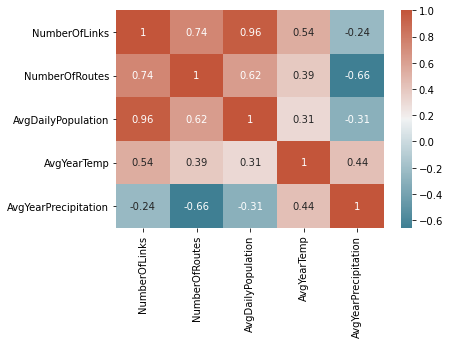

In [137]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.filter(like = 'Porto', axis=0).corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

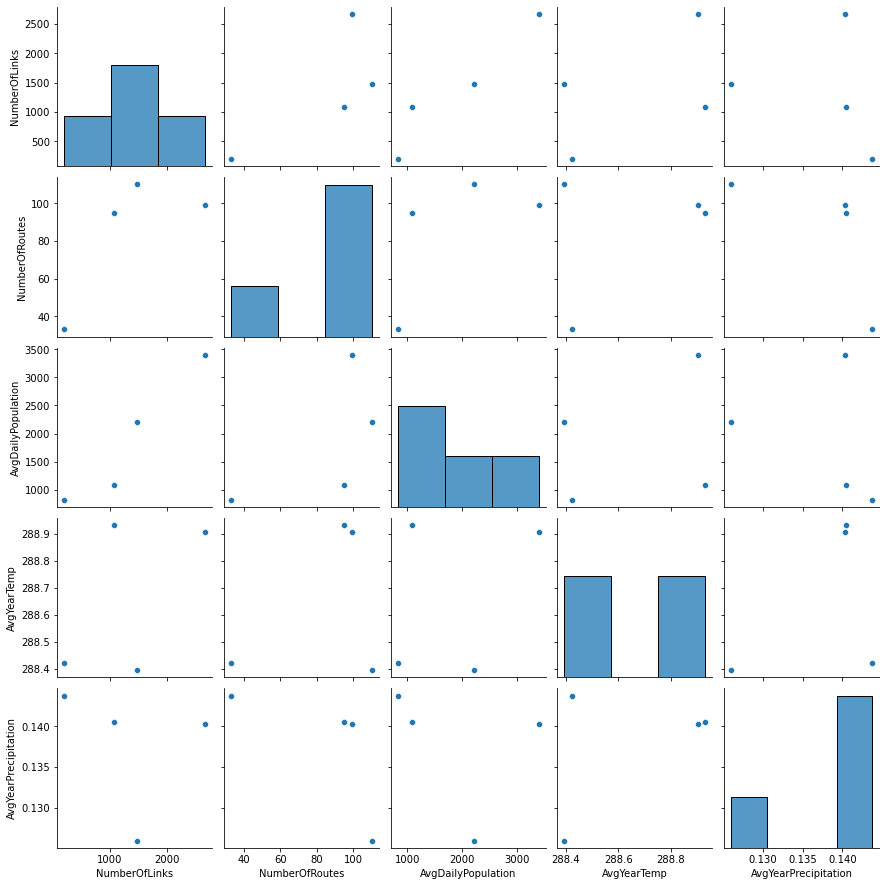

In [138]:
sns.pairplot(linksRoutesPerOrigin.filter(like = 'Porto', axis=0))

## Correlation Matrix (Lisbon)

<AxesSubplot:>

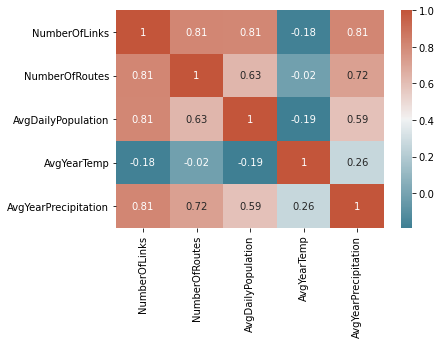

In [141]:
# calculate correlation matrix
corr = linksRoutesPerOrigin.filter(like = 'Lisboa', axis=0).corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

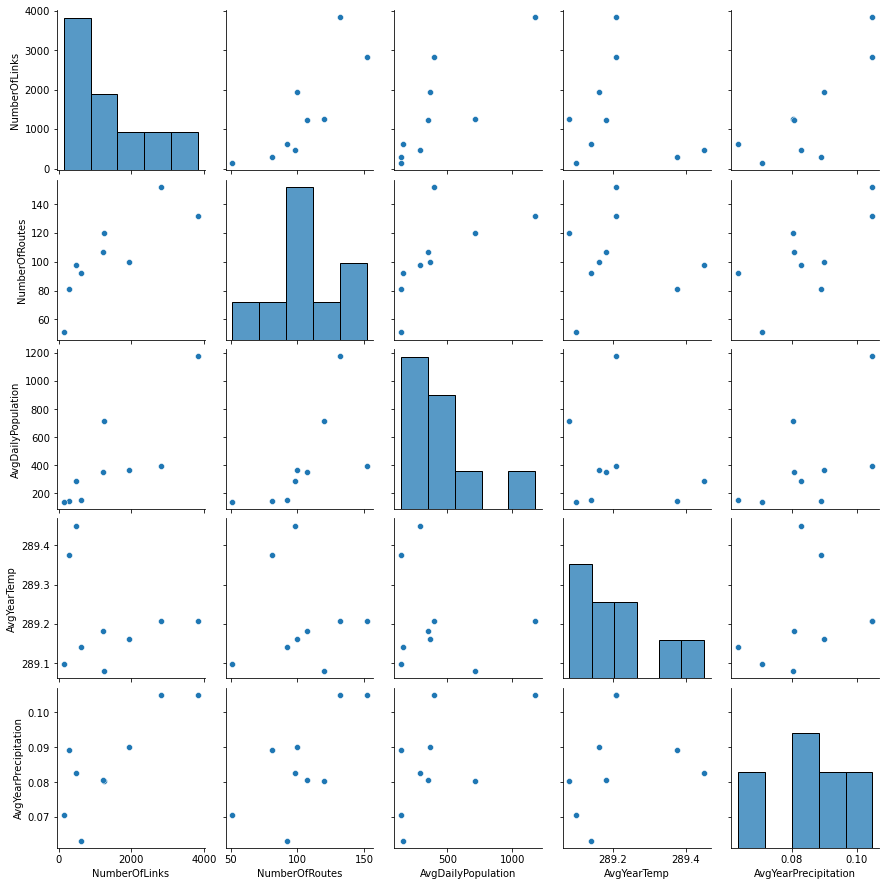

In [142]:
sns.pairplot(linksRoutesPerOrigin.filter(like = 'Lisboa', axis=0))

Some key takeways:
- Obviously theres a positive correlation between the number of routes available and the number of links.
- Perhaps more interesting is that there's an overall positive correlation between the number of links and the average daily population of senior citizens that use public transports.
- Theres also a positive correlation between the number of routes available and the average daily population of senior citizens that use public transports. However, that correlation is not as big as the one related to links.
- Theres a somewhat positive correlation between the precipitation and the number of senior citizens using public transports

Based on this takeways we can possibly create a model that predicts daily population of public transports based on the number of links and routes available as well as the precipitation of a specific region.